In [21]:
import openmeteo_requests

import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [38]:
def call_open_meteo_temp(selected_station, month):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)
    
    # Initialize an empty list to store monthly data
    monthly_data = []
    
    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1940-01-01")
    end_date = pd.Timestamp("2024-02-29")
    
    # Iterate through each month
    while start_date < end_date:
        # Calculate the end of the month
        end_of_month = start_date + pd.offsets.MonthEnd(0)
        if end_of_month.strftime('%m') == month:
            # Define the parameters for the API call
            params = {
                "latitude": selected_station["lat"],
                "longitude": selected_station["lon"],
                "start_date": start_date.strftime("%Y-%m-%d"),
                "end_date": end_of_month.strftime("%Y-%m-%d"),
                "daily": "temperature_2m_mean",
                "timezone": "Europe/Berlin",
            }
            
            # Make the API call
            responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
            
            # Process first location. Add a for-loop for multiple locations or weather models
            for response in responses:
                # Process daily data. The order of variables needs to be the same as requested.
                daily = response.Daily()
                daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
    
                daily_data = {
                    "date": start_date.strftime('%Y'),  # Format date to include only year and month
                    "temperature_2m_mean": daily_temperature_2m_mean,
                }
                daily_dataframe = pd.DataFrame(data=daily_data)
                    
                # Append daily data to monthly_data list
                monthly_data.append(daily_dataframe)

        # Move to the next month
        start_date = end_of_month + pd.Timedelta(days=1)

    # Concatenate all daily dataframes into one dataframe
    all_data = pd.concat(monthly_data)

    # Calculate monthly averages
    monthly_averages = all_data.groupby('date').mean()

    return monthly_averages

In [39]:
def call_open_meteo_max(selected_station, month):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store monthly data
    monthly_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1940-01-01")
    end_date = pd.Timestamp("2024-02-29")

    # Iterate through each month
    while start_date < end_date:
        # Calculate the end of the month
        end_of_month = start_date + pd.offsets.MonthEnd(0)
        if end_of_month.strftime('%m') == month:
            # Define the parameters for the API call
            params = {
                "latitude": selected_station["lat"],
                "longitude": selected_station["lon"],
                "start_date": start_date.strftime("%Y-%m-%d"),
                "end_date": end_of_month.strftime("%Y-%m-%d"),
                "daily": "wind_speed_10m_max",
                "timezone": "Europe/Berlin",
            }
    
            # Make the API call
            responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
    
            for response in responses:
                # Process daily data. The order of variables needs to be the same as requested.
                daily = response.Daily()
                daily_wind_speed_10m_max = daily.Variables(0).ValuesAsNumpy()
    
                daily_data = {
                    "date": start_date.strftime('%Y'),  # Format date to include only year and month
                    "wind_speed_10m_max": daily_wind_speed_10m_max,
                }
    
                daily_dataframe = pd.DataFrame(data=daily_data)
                
                # Append daily data to monthly_data list
                monthly_data.append(daily_dataframe)

        # Move to the next month
        start_date = end_of_month + pd.Timedelta(days=1)

    # Concatenate all daily dataframes into one dataframe
    all_data = pd.concat(monthly_data)

    # Find the maximum wind speed for each month
    monthly_max = all_data.groupby('date')['wind_speed_10m_max'].max()

    return monthly_max

In [45]:
def call_open_meteo_min(selected_station, month):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store monthly data
    monthly_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1940-01-01")
    end_date = pd.Timestamp("2024-02-29")

    # Iterate through each month
    while start_date < end_date:
        # Calculate the end of the month
        end_of_month = start_date + pd.offsets.MonthEnd(0)
        if end_of_month.strftime('%m') == month:
            # Define the parameters for the API call
            params = {
                "latitude": selected_station["lat"],
                "longitude": selected_station["lon"],
                "start_date": start_date.strftime("%Y-%m-%d"),
                "end_date": end_of_month.strftime("%Y-%m-%d"),
                "daily": "wind_speed_10m_max",
                "timezone": "Europe/Berlin",
            }
    
            # Make the API call
            responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
    
            for response in responses:
                # Process daily data. The order of variables needs to be the same as requested.
                daily = response.Daily()
                daily_wind_speed_10m_max = daily.Variables(0).ValuesAsNumpy()
    
                daily_data = {
                    "date": start_date.strftime('%Y'),  # Format date to include only year and month
                    "wind_speed_10m_max": daily_wind_speed_10m_max,
                }
    
                daily_dataframe = pd.DataFrame(data=daily_data)
                
                # Append daily data to monthly_data list
                monthly_data.append(daily_dataframe)

        # Move to the next month
        start_date = end_of_month + pd.Timedelta(days=1)

    # Concatenate all daily dataframes into one dataframe
    all_data = pd.concat(monthly_data)

    # Find the maximum wind speed for each month
    monthly_min = all_data.groupby('date')['wind_speed_10m_max'].min()

    return monthly_min

In [41]:
def call_open_meteo_averages(selected_station, month):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store monthly data
    monthly_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1940-01-01")
    end_date = pd.Timestamp("2024-02-29")

    # Iterate through each month
    while start_date < end_date:
        # Calculate the end of the month
        end_of_month = start_date + pd.offsets.MonthEnd(0)
        if end_of_month.strftime('%m') == month:
            # Define the parameters for the API call
            params = {
                "latitude": selected_station["lat"],
                "longitude": selected_station["lon"],
                "start_date": start_date.strftime("%Y-%m-%d"),
                "end_date": end_of_month.strftime("%Y-%m-%d"),
                "daily": "wind_speed_10m_max",
                "timezone": "Europe/Berlin",
            }
    
            # Make the API call
            responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
    
            for response in responses:
                # Process daily data. The order of variables needs to be the same as requested.
                daily = response.Daily()
                daily_wind_speed_10m_max = daily.Variables(0).ValuesAsNumpy()
    
                daily_data = {
                    "date": start_date.strftime('%Y'),  # Format date to include only year and month
                    "wind_speed_10m_max": daily_wind_speed_10m_max,
                }
    
                daily_dataframe = pd.DataFrame(data=daily_data)
                
                # Append daily data to monthly_data list
                monthly_data.append(daily_dataframe)

        # Move to the next month
        start_date = end_of_month + pd.Timedelta(days=1)

    # Concatenate all daily dataframes into one dataframe
    all_data = pd.concat(monthly_data)

    # Calculate monthly averages
    monthly_averages = all_data.groupby('date').mean()

    return monthly_averages


In [46]:
Frankreich_Paris={'lat': 48.8566, 'lon': 2.3522}
Frankreich_Paris_wmean = call_open_meteo_averages(Frankreich_Paris, "01")
%store Frankreich_Paris_wmean
Frankreich_Paris_wmin = call_open_meteo_min(Frankreich_Paris, "01")
%store Frankreich_Paris_wmin
Frankreich_Paris_wmax = call_open_meteo_max(Frankreich_Paris, "01")
%store Frankreich_Paris_wmax
Frankreich_Paris_tmean = call_open_meteo_temp(Frankreich_Paris, "01")
%store Frankreich_Paris_tmean

Stored 'Frankreich_Paris_wmean' (DataFrame)
Stored 'Frankreich_Paris_wmin' (Series)
Stored 'Frankreich_Paris_wmax' (Series)
Stored 'Frankreich_Paris_tmean' (DataFrame)


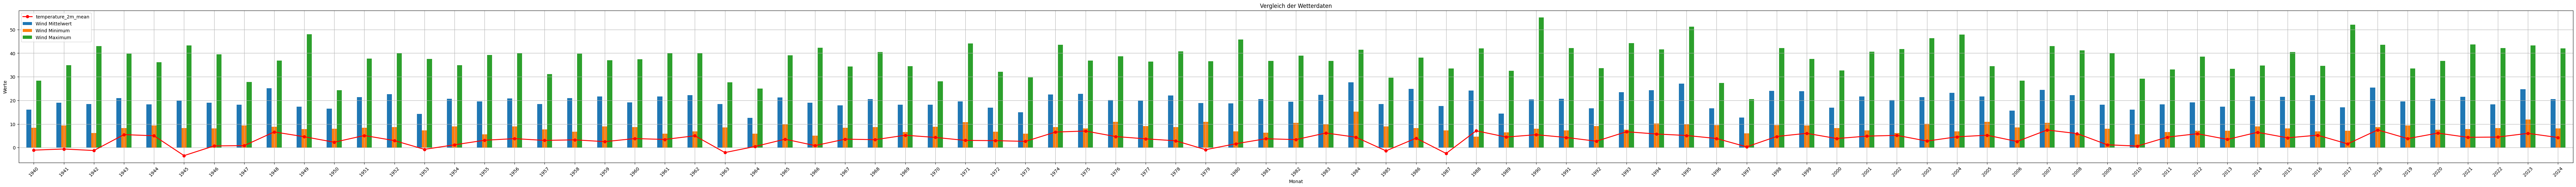

In [47]:
# Kombinieren der Daten in einem DataFrame
data = pd.concat([Frankreich_Paris_wmean, Frankreich_Paris_wmin, Frankreich_Paris_wmax], axis=1)
data.columns = ['Wind Mittelwert', 'Wind Minimum', 'Wind Maximum']

# Plot
ax = data.plot(kind='bar', figsize=(100, 6))

# Hinzufügen der Linie für die Temperaturdaten
Frankreich_Paris_tmean.plot(ax=ax, color='red', marker='o', linewidth=2, label='Temperatur Mittelwert')

# Beschriftungen und Anpassungen
plt.xlabel('Monat')
plt.ylabel('Werte')
plt.title('Vergleich der Wetterdaten')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()